In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/smartwatches.csv")
df.head()


,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


Raw Data ➝ Handle missing values ➝ Remove outliers ➝ Analyze skew ➝ Fix skew (if needed) ➝ Feature scaling ➝ Model training


In [2]:
df.drop(columns="Unnamed: 0", inplace=True)

df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.shape

(440, 15)

In [5]:
numerical = [feature for feature in df.columns if df[feature].dtype != "object"]
numerical

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [6]:
categorical = [feature for feature in df.columns if df[feature].dtype == "object"]
categorical

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [7]:
df[numerical].isnull().sum()

Current Price          10
Original Price         73
Discount Percentage    73
Rating                  6
Number OF Ratings      59
Battery Life (Days)    32
dtype: int64

In [8]:
df["Current Price"].isnull().sum()

np.int64(10)

In [9]:
df["Current Price"].median()

np.float64(3999.0)

In [10]:
df["Current Price"].fillna( df["Current Price"].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\799000330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Current Price"].fillna( df["Current Price"].median(), inplace=True)


In [11]:
df["Current Price"].isnull().sum()

np.int64(0)

In [12]:
df["Current Price"].value_counts()

Current Price
1999.0    28
3999.0    28
1799.0    27
1499.0    15
2999.0    15
          ..
5998.0     1
2899.0     1
3700.0     1
3200.0     1
3000.0     1
Name: count, Length: 164, dtype: int64

In [13]:
df["Original Price"] = df["Original Price"].fillna(df["Original Price"].median())


In [14]:
df["Original Price"].isnull().sum()

np.int64(0)

In [15]:
df["Discount Percentage"].head()

0     7.686318
1    77.651627
2    74.981227
3    91.004550
4    68.013603
Name: Discount Percentage, dtype: float64

In [16]:
df["Discount Percentage"] = df["Discount Percentage"].fillna(0.0)

In [17]:
df["Discount Price"] = df["Original Price"] * (df["Discount Percentage"]) /100 
df["Discount Price"].head()

0     6910.000000
1    13200.000001
2     5991.000000
3    18200.000000
4     3400.000000
Name: Discount Price, dtype: float64

In [18]:
df["Discount Price"].value_counts()

Discount Price
0.000000       73
4000.000000    12
3200.000000     7
2200.000000     6
3000.000000     5
               ..
3400.000000     1
8999.999999     1
6299.000000     1
4799.000000     1
2400.000000     1
Name: count, Length: 273, dtype: int64

In [19]:
df["Discount Price"].isnull().sum()

np.int64(0)

In [20]:
df["Discount Price"] = df["Discount Price"].apply( lambda x:  np.nan if x == 0.000000 else x)

df["Discount Price"].isnull().sum()

np.int64(73)

In [21]:
df["Discount Price"].skew()

np.float64(1.6895763217716477)

In [22]:
df["Discount Price"] = df["Discount Price"].fillna(df["Discount Price"].median())


In [23]:
df["Discount Price"].isnull().sum()

np.int64(0)

In [24]:
df["Discount Price"].value_counts()

Discount Price
4001.000000     74
4000.000000     12
3200.000000      7
2200.000000      6
6000.000000      5
                ..
9000.000000      1
6910.000000      1
13200.000001     1
18200.000000     1
4500.000000      1
Name: count, Length: 272, dtype: int64

In [25]:
df[numerical].head()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
0,82990.0,89900.0,7.686318,4.0,65.0,8.0
1,3799.0,16999.0,77.651627,4.3,20788.0,3.5
2,1999.0,7990.0,74.981227,3.8,21724.0,8.0
3,1799.0,19999.0,91.004550,4.3,13244.0,3.5
4,1599.0,4999.0,68.013603,4.1,13901.0,8.0


In [26]:
df[numerical].isnull().sum()

Current Price           0
Original Price          0
Discount Percentage     0
Rating                  6
Number OF Ratings      59
Battery Life (Days)    32
dtype: int64

In [27]:
df["Rating"].skew()

np.float64(-1.5678036397199386)

In [28]:
df["Rating"] = df["Rating"].fillna(df["Rating"].median())

In [29]:
df["Rating"].isnull().sum()

np.int64(0)

In [30]:
df["Number OF Ratings"] = df["Number OF Ratings"].fillna(df["Number OF Ratings"].median())
df["Number OF Ratings"].dtype

dtype('float64')

In [31]:
df["Battery Life (Days)"].value_counts()

Battery Life (Days)
22.00    176
8.00      97
3.50      72
17.50     42
12.50     12
3.60       6
0.75       3
Name: count, dtype: int64

In [32]:
df["Battery Life (Days)"].skew()

np.float64(-0.2317114477910843)

In [33]:
df["Battery Life (Days)"] = df["Battery Life (Days)"].fillna(df["Battery Life (Days)"].mean())
df["Battery Life (Days)"].isnull().sum()

np.int64(0)

In [34]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 449
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        440 non-null    float64
 1   Original Price       440 non-null    float64
 2   Discount Percentage  440 non-null    float64
 3   Rating               440 non-null    float64
 4   Number OF Ratings    440 non-null    float64
 5   Battery Life (Days)  440 non-null    float64
dtypes: float64(6)
memory usage: 24.1 KB


In [35]:
df["Number OF Ratings"].astype("float")

0         65.0
1      20788.0
2      21724.0
3      13244.0
4      13901.0
        ...   
445      830.0
446      830.0
447      830.0
448      830.0
449      830.0
Name: Number OF Ratings, Length: 440, dtype: float64

In [36]:
df[numerical].describe()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12794.250000,13648.854545,39.612120,4.033864,9981.279545,14.237377
std,17734.708001,14483.626960,28.146974,0.552290,38206.552996,7.453448
min,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,2299.000000,5999.000000,10.110964,3.900000,99.750000,8.000000
50%,3999.000000,7999.000000,45.004501,4.100000,830.000000,14.237377
75%,17121.750000,14991.250000,64.012803,4.300000,4723.750000,22.000000
max,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


In [37]:
df["Discount Percentage"].skew()

np.float64(-0.42042568833944094)

{'whiskers': [<matplotlib.lines.Line2D at 0x20946d4d310>,
 'caps': [<matplotlib.lines.Line2D at 0x20946d4d940>,
 'boxes': [<matplotlib.lines.Line2D at 0x20946d4d0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20946d4df10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20946d4e240>],
 'means': []}

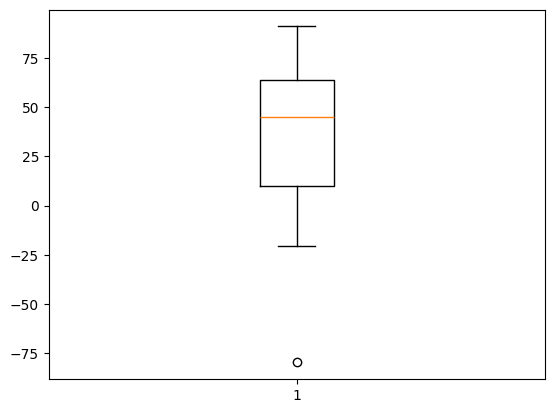

In [38]:
plt.boxplot(df["Discount Percentage"])

In [39]:
df["Discount Price"].skew()

np.float64(1.963474740645439)

In [40]:
df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g,6910.000000
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g,13200.000001
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g,5991.000000
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +,18200.000000
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g,3400.000000


In [41]:


df.drop(columns="Discount Percentage", inplace=True)



In [42]:
df.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g,6910.000000
1,fire-boltt,3799.0,16999.0,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g,13200.000001
2,boat,1999.0,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g,5991.000000
3,fire-boltt,1799.0,19999.0,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +,18200.000000
4,noise,1599.0,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g,3400.000000


In [43]:
numerical = [feature for feature in df.columns if df[feature].dtype != "object"]
numerical

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Discount Price']

In [44]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 449
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        440 non-null    float64
 1   Original Price       440 non-null    float64
 2   Rating               440 non-null    float64
 3   Number OF Ratings    440 non-null    float64
 4   Battery Life (Days)  440 non-null    float64
 5   Discount Price       440 non-null    float64
dtypes: float64(6)
memory usage: 24.1 KB


In [45]:
df[numerical].describe()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Discount Price
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12794.250000,13648.854545,4.033864,9981.279545,14.237377,4936.252273
std,17734.708001,14483.626960,0.552290,38206.552996,7.453448,3540.956731
min,1199.000000,1669.000000,1.000000,1.000000,0.750000,-2500.000000
25%,2299.000000,5999.000000,3.900000,99.750000,8.000000,3000.000000
50%,3999.000000,7999.000000,4.100000,830.000000,14.237377,4001.000000
75%,17121.750000,14991.250000,4.300000,4723.750000,22.000000,5991.000000
max,139990.000000,96390.000000,5.000000,619130.000000,22.000000,19588.999998


In [46]:
df[numerical].skew()

Current Price           2.730871
Original Price          2.956394
Rating                 -1.583023
Number OF Ratings      10.870748
Battery Life (Days)    -0.240562
Discount Price          1.963475
dtype: float64

In [47]:
df["Number OF Ratings"].value_counts()

Number OF Ratings
830.0     60
6.0       10
3.0       10
5.0        8
2847.0     7
          ..
1328.0     1
469.0      1
17.0       1
33.0       1
83.0       1
Name: count, Length: 250, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x20946e11850>,
 'caps': [<matplotlib.lines.Line2D at 0x20946e11e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x20946e10dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20946e122d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20946e12570>],
 'means': []}

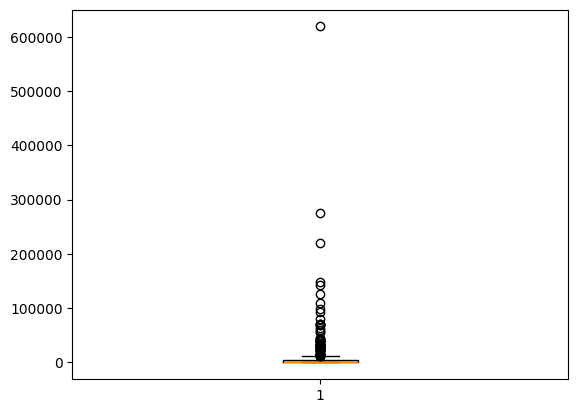

In [48]:
plt.boxplot(df["Number OF Ratings"])

In [49]:
df.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g,6910.000000
1,fire-boltt,3799.0,16999.0,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g,13200.000001
2,boat,1999.0,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g,5991.000000
3,fire-boltt,1799.0,19999.0,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +,18200.000000
4,noise,1599.0,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g,3400.000000


In [50]:
df["Display Size"].head()

0           NaN
1    1.8 inches
2    1.7 inches
3    1.8 inches
4    1.7 inches
Name: Display Size, dtype: object

In [51]:
df["Display Size"].isnull().sum()

np.int64(30)

In [52]:
df["Display Size"] = df["Display Size"].fillna("0.0 inches")
df["Display Size"].isnull().sum()

np.int64(0)

In [53]:
"1.7 inches".split()[0]

'1.7'

In [54]:
df["Display Size"] = df["Display Size"].apply( lambda x: float(x.split()[0]) )
df["Display Size"].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [55]:
df["Display Size"] = df["Display Size"].apply( lambda x: np.nan if x == 0.0 else x)

In [56]:
df["Display Size"].isnull().sum()

np.int64(31)

In [57]:
df["Display Size"].skew()

np.float64(6.78718426845856)

In [58]:
df["Display Size"] = df["Display Size"].fillna(df["Display Size"].median())
df["Display Size"].isnull().sum()

np.int64(0)

In [59]:
numerical = [feature for feature in df.columns if df[feature].dtype != "object"]
numerical

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Discount Price']

In [60]:
df.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,1.6,35 - 50 g,6910.000000
1,fire-boltt,3799.0,16999.0,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,50 - 75 g,13200.000001
2,boat,1999.0,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,35 - 50 g,5991.000000
3,fire-boltt,1799.0,19999.0,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75g +,18200.000000
4,noise,1599.0,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,35 - 50 g,3400.000000


In [61]:
df["Weight"].head()

0    35 - 50 g
1    50 - 75 g
2    35 - 50 g
3        75g +
4    35 - 50 g
Name: Weight, dtype: object

In [62]:
df["Weight"].value_counts()

Weight
20 - 35 g    78
75g +        65
35 - 50 g    55
<= 20 g      43
50 - 75 g    13
Name: count, dtype: int64

In [63]:
calc = (20 + 35) / 2
calc
df["Weight"].replace("20 - 35 g", calc, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\4181025633.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].replace("20 - 35 g", calc, inplace=True)


In [64]:
df["Weight"].value_counts()

Weight
27.5         78
75g +        65
35 - 50 g    55
<= 20 g      43
50 - 75 g    13
Name: count, dtype: int64

In [65]:
calc1 = (35 + 50) / 2
calc1
df["Weight"].replace("35 - 50 g", calc1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\627980576.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].replace("35 - 50 g", calc1, inplace=True)


In [66]:
df["Weight"].replace("75g +", 76, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\159393965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].replace("75g +", 76, inplace=True)


In [67]:
calc2 = (50 + 75) / 2
calc2
df["Weight"].replace("50 - 75 g", calc2, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\3939486191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].replace("50 - 75 g", calc2, inplace=True)


In [68]:
df["Weight"].replace("<= 20 g", 20, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\298182756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].replace("<= 20 g", 20, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\298182756.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Weight"].replace("<= 20 

In [69]:
df["Weight"]

0      42.5
1      62.5
2      42.5
3      76.0
4      42.5
       ... 
445     NaN
446     NaN
447     NaN
448     NaN
449     NaN
Name: Weight, Length: 440, dtype: float64

In [70]:
numerical = [feature for feature in df.columns if df[feature].dtype != "object"]
numerical

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [71]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 449
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        440 non-null    float64
 1   Original Price       440 non-null    float64
 2   Rating               440 non-null    float64
 3   Number OF Ratings    440 non-null    float64
 4   Battery Life (Days)  440 non-null    float64
 5   Display Size         440 non-null    float64
 6   Weight               254 non-null    float64
 7   Discount Price       440 non-null    float64
dtypes: float64(8)
memory usage: 30.9 KB


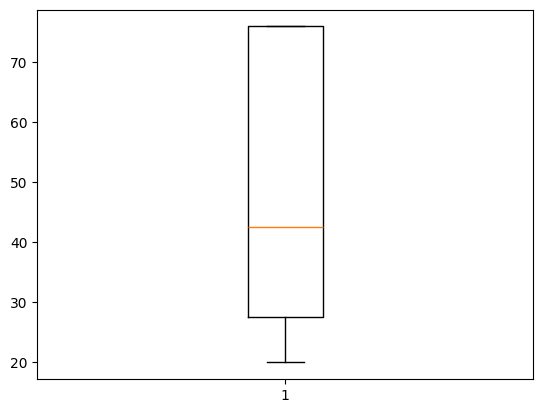

In [72]:
plt.boxplot(df["Weight"].dropna())  # drop NaNs for clean plot
plt.show()


In [73]:
df["Weight"].value_counts()

Weight
27.5    78
76.0    65
42.5    55
20.0    43
62.5    13
Name: count, dtype: int64

In [74]:
df["Weight"].isnull().sum()

np.int64(186)

In [75]:
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())
df["Weight"].isnull().sum()

np.int64(0)

In [76]:
df["Weight"].head()

0    42.5
1    62.5
2    42.5
3    76.0
4    42.5
Name: Weight, dtype: float64

In [77]:
def remove_outlier_IQR(df, column):
    """
    Removes outliers from a specified column in the dataframe using the IQR method.
    
    Parameters:
        df (pd.DataFrame): The input dataframe
        column (str): The column name to clean
    
    Returns:
        pd.DataFrame: A new dataframe with outliers removed
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df


In [78]:
numerical

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [79]:
df_cleaned = remove_outlier_IQR(df,"Current Price") 
df_cleaned = remove_outlier_IQR(df,"Original Price")
df_cleaned = remove_outlier_IQR(df,"Rating")
df_cleaned = remove_outlier_IQR(df,"Number OF Ratings")
df_cleaned = remove_outlier_IQR(df,"Battery Life (Days)")
df_cleaned = remove_outlier_IQR(df,"Display Size")
df_cleaned = remove_outlier_IQR(df,"Weight")
df_cleaned = remove_outlier_IQR(df,"Discount Price")


In [80]:
df_cleaned.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.000000,Yes,1.6,42.5,6910.0
2,boat,1999.0,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.000000,Yes,1.7,42.5,5991.0
4,noise,1599.0,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.000000,Yes,1.7,42.5,3400.0
5,noise,1499.0,3999.0,4.0,32704.0,NSW-05,NaN,NaN,Other,Yes,8.000000,Yes,1.7,42.5,2500.0
6,noise,1999.0,4999.0,4.1,1018.0,NaN,NaN,NaN,NaN,NaN,14.237377,Yes,1.4,42.5,3000.0


In [81]:

df_cleaned[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 0 to 449
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        405 non-null    float64
 1   Original Price       405 non-null    float64
 2   Rating               405 non-null    float64
 3   Number OF Ratings    405 non-null    float64
 4   Battery Life (Days)  405 non-null    float64
 5   Display Size         405 non-null    float64
 6   Weight               405 non-null    float64
 7   Discount Price       405 non-null    float64
dtypes: float64(8)
memory usage: 28.5 KB


In [82]:
df_cleaned[numerical].describe()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
count,405.00000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,12090.34321,11845.782716,4.017037,10488.955556,14.659652,2.195556,43.238515,4189.822222
std,17456.44239,12242.545752,0.562157,39718.959882,7.342598,4.455937,15.791844,1994.097020
min,1199.00000,1669.000000,1.000000,1.000000,0.750000,0.100000,20.000000,-1330.000000
25%,2199.00000,5999.000000,3.800000,102.000000,8.000000,1.300000,27.500000,3000.000000
50%,3999.00000,7999.000000,4.100000,830.000000,17.500000,1.600000,43.681102,4001.000000
75%,16495.00000,9999.000000,4.300000,4694.000000,22.000000,1.800000,43.681102,5291.000000
max,139990.00000,93990.000000,5.000000,619130.000000,22.000000,45.000000,76.000000,10200.000000


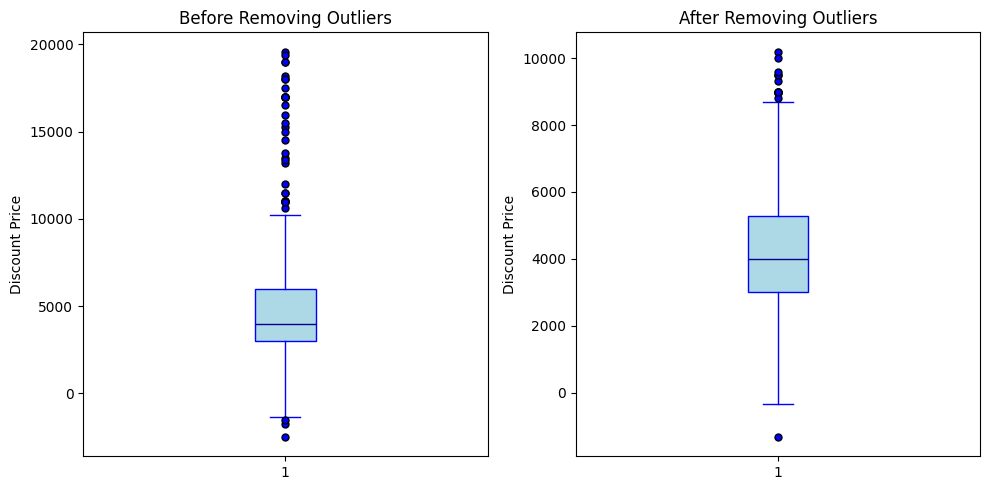

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Boxplot before removing outliers
plt.subplot(1, 2, 1)
plt.boxplot(df['Discount Price'].dropna(), patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='darkblue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='blue', marker='o', markersize=5))
plt.title('Before Removing Outliers')
plt.ylabel('Discount Price')

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['Discount Price'].dropna(), patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='darkblue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='blue', marker='o', markersize=5))
plt.title('After Removing Outliers')
plt.ylabel('Discount Price')

plt.tight_layout()
plt.show()


In [84]:


df_cleaned[numerical].corr()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
Current Price,1.000000,0.606116,0.381907,-0.121835,0.011153,-0.000576,-0.197512,-0.045103
Original Price,0.606116,1.000000,0.217907,-0.097547,-0.113293,0.023507,-0.133562,0.132954
Rating,0.381907,0.217907,1.000000,0.061105,-0.071394,0.062521,-0.209717,-0.054428
Number OF Ratings,-0.121835,-0.097547,0.061105,1.000000,0.036082,-0.034527,0.031016,-0.013652
Battery Life (Days),0.011153,-0.113293,-0.071394,0.036082,1.000000,0.019487,-0.101403,-0.148209
Display Size,-0.000576,0.023507,0.062521,-0.034527,0.019487,1.000000,0.018378,-0.037189
Weight,-0.197512,-0.133562,-0.209717,0.031016,-0.101403,0.018378,1.000000,0.054222
Discount Price,-0.045103,0.132954,-0.054428,-0.013652,-0.148209,-0.037189,0.054222,1.000000


In [85]:
df_cleaned[numerical].skew()

Current Price           2.880651
Original Price          3.434366
Rating                 -1.515544
Number OF Ratings      10.479554
Battery Life (Days)    -0.313537
Display Size            6.765819
Weight                  0.765048
Discount Price          0.564948
dtype: float64

In [86]:
right_sk = ["Current Price","Original Price","Number OF Ratings","Display Size","Weight", "Discount Price"]
left_sk =["Rating"]

<Axes: xlabel='Number OF Ratings', ylabel='Count'>

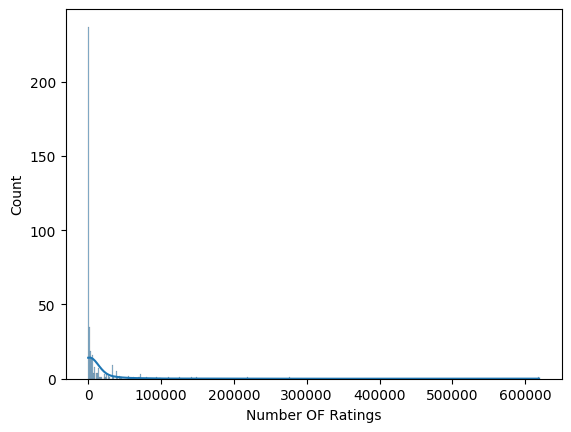

In [87]:
sns.histplot(df_cleaned['Number OF Ratings'], kde=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\2815205052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Number OF Ratings'] = np.log1p(df_cleaned['Number OF Ratings'])# log1p(x) = log(x + 1)


<Axes: xlabel='Number OF Ratings', ylabel='Count'>

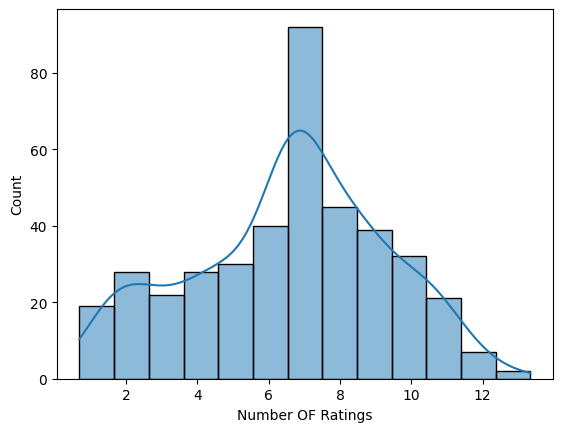

In [88]:
df_cleaned['Number OF Ratings'] = np.log1p(df_cleaned['Number OF Ratings'])# log1p(x) = log(x + 1)
df_cleaned["Number OF Ratings"].skew()
sns.histplot(df_cleaned["Number OF Ratings"], kde=True)

In [89]:
df_cleaned[numerical].skew()

Current Price          2.880651
Original Price         3.434366
Rating                -1.515544
Number OF Ratings     -0.201403
Battery Life (Days)   -0.313537
Display Size           6.765819
Weight                 0.765048
Discount Price         0.564948
dtype: float64

In [90]:
df_cleaned["Display Size"] = np.log1p(df_cleaned["Display Size"])
df_cleaned["Original Price"] = np.log1p(df_cleaned["Original Price"])
df_cleaned["Current Price"] = np.log1p(df_cleaned["Current Price"])


C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\3194587620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Display Size"] = np.log1p(df_cleaned["Display Size"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\3194587620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Original Price"] = np.log1p(df_cleaned["Original Price"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\3194587620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [91]:
df_cleaned[numerical].skew()

Current Price          0.670321
Original Price         1.119572
Rating                -1.515544
Number OF Ratings     -0.201403
Battery Life (Days)   -0.313537
Display Size           2.444234
Weight                 0.765048
Discount Price         0.564948
dtype: float64

In [92]:
df_cleaned["Weight"] = np.log1p(df_cleaned["Weight"])
df_cleaned[numerical].skew()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\3266386018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Weight"] = np.log1p(df_cleaned["Weight"])


Current Price          0.670321
Original Price         1.119572
Rating                -1.515544
Number OF Ratings     -0.201403
Battery Life (Days)   -0.313537
Display Size           2.444234
Weight                -0.140357
Discount Price         0.564948
dtype: float64

In [93]:
df_cleaned['Rating'] = df_cleaned['Rating'] ** 2
df_cleaned['Number OF Ratings'] = df_cleaned['Number OF Ratings'] ** 2

df_cleaned[numerical].skew()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\1503782715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Rating'] = df_cleaned['Rating'] ** 2
C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\1503782715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Number OF Ratings'] = df_cleaned['Number OF Ratings'] ** 2


Current Price          0.670321
Original Price         1.119572
Rating                -0.825257
Number OF Ratings      0.674800
Battery Life (Days)   -0.313537
Display Size           2.444234
Weight                -0.140357
Discount Price         0.564948
dtype: float64

In [94]:
df_cleaned.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,11.326487,11.406464,16.00,17.553207,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.000000,Yes,0.955511,3.772761,6910.0
2,boat,7.600902,8.986071,14.44,99.724569,Wave Call,NaN,NaN,Silicon,Yes,8.000000,Yes,0.993252,3.772761,5991.0
4,noise,7.377759,8.517193,16.81,91.007555,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.000000,Yes,0.993252,3.772761,3400.0
5,noise,7.313220,8.294050,16.00,108.061914,NSW-05,NaN,NaN,Other,Yes,8.000000,Yes,0.993252,3.772761,2500.0
6,noise,7.600902,8.517193,16.81,47.977469,NaN,NaN,NaN,NaN,NaN,14.237377,Yes,0.875469,3.772761,3000.0


In [95]:
df_cleaned[numerical].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,11.326487,11.406464,16.00,17.553207,8.000000,0.955511,3.772761,6910.0
2,7.600902,8.986071,14.44,99.724569,8.000000,0.993252,3.772761,5991.0
4,7.377759,8.517193,16.81,91.007555,8.000000,0.993252,3.772761,3400.0
5,7.313220,8.294050,16.00,108.061914,8.000000,0.993252,3.772761,2500.0
6,7.600902,8.517193,16.81,47.977469,14.237377,0.875469,3.772761,3000.0


In [96]:
df_cleaned[	"Discount Price"].describe()

count      405.000000
mean      4189.822222
std       1994.097020
min      -1330.000000
25%       3000.000000
50%       4001.000000
75%       5291.000000
max      10200.000000
Name: Discount Price, dtype: float64

Feature Scaling..

In [97]:
df_cleaned[numerical].iloc[:,:].columns

Index(['Current Price', 'Original Price', 'Rating', 'Number OF Ratings',
       'Battery Life (Days)', 'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(df_cleaned[numerical].iloc[:,:-1])
y_scaled = scaler.fit_transform(df_cleaned[numerical].iloc[:, [-1]])



In [99]:
x_scaled


array([[ 2.30294191e+00,  3.49597547e+00, -1.10907061e-01, ...,
        -9.08110398e-01,  3.22929163e-02,  1.28403220e-01],
       [-9.12814917e-01, -1.78067151e-01, -4.93830067e-01, ...,
        -9.08110398e-01,  1.07232699e-01,  1.28403220e-01],
       [-1.10542236e+00, -8.89801827e-01,  8.79183465e-02, ...,
        -9.08110398e-01,  1.07232699e-01,  1.28403220e-01],
       ...,
       [ 3.54576319e-02,  2.43059877e-03, -2.50417585e+00, ...,
         1.00093004e+00, -2.11154660e-01,  2.03285741e-01],
       [-5.06859301e-01, -1.76358492e-01,  8.79183465e-02, ...,
         1.00093004e+00, -1.67578169e+00,  2.03285741e-01],
       [-5.62548063e-01, -1.76358492e-01,  8.79183465e-02, ...,
         1.00093004e+00, -1.67578169e+00,  2.03285741e-01]])

In [100]:
y_scaled

array([[ 1.36580228],
       [ 0.90437204],
       [-0.39657003],
       [-0.84846037],
       [-0.59741018],
       [-0.99909048],
       [ 0.15574038],
       [-0.09530981],
       [-0.09530981],
       [-0.99909048],
       [ 0.00511027],
       [-0.84846037],
       [-0.09530981],
       [-0.34636   ],
       [-0.49699011],
       [-0.09530981],
       [-0.09530981],
       [-0.34636   ],
       [-0.99909048],
       [-0.59741018],
       [ 0.55290177],
       [ 0.65332185],
       [ 0.80395196],
       [ 0.50269174],
       [ 0.60311181],
       [ 0.90437204],
       [ 0.90437204],
       [-0.49699011],
       [ 0.55290177],
       [-0.49699011],
       [ 0.17632649],
       [ 0.20595042],
       [ 0.80847086],
       [ 1.6620415 ],
       [-2.26990653],
       [ 1.41099131],
       [ 0.90889094],
       [ 2.41519206],
       [-0.09480771],
       [-1.10402946],
       [ 0.65784075],
       [ 2.16414187],
       [-0.09480771],
       [ 2.41519206],
       [-0.09480771],
       [-0

In [102]:
x_scaled_df = pd.DataFrame(data=x_scaled, columns=df_cleaned[numerical].iloc[:,:-1].columns)

x_scaled_df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,2.302942,3.495975,-0.110907,-0.931909,-0.908110,0.032293,0.128403
1,-0.912815,-0.178067,-0.493830,1.400679,-0.908110,0.107233,0.128403
2,-1.105422,-0.889802,0.087918,1.153230,-0.908110,0.107233,0.128403
3,-1.161129,-1.228523,-0.110907,1.637350,-0.908110,0.107233,0.128403
4,-0.912815,-0.889802,0.087918,-0.068260,-0.057581,-0.126645,0.128403


In [103]:
y_scaled_df = pd.DataFrame(data=y_scaled, columns=["Discount Price"])

In [104]:
y_scaled_df.describe()

,Discount Price
count,4.050000e+02
mean,-3.421132e-16
std,1.001237e+00
min,-2.771505e+00
25%,-5.974102e-01
50%,-9.480771e-02
75%,5.529018e-01
max,3.017713e+00


In [105]:
scaled_df = pd.concat([x_scaled_df.reset_index(),y_scaled_df.reset_index()], axis=1)

scaled_df.head()
scaled_df.isnull().sum()


index                  0
Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
index                  0
Discount Price         0
dtype: int64

In [106]:
df_cleaned[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 0 to 449
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           405 non-null    object 
 1   Model Name      378 non-null    object 
 2   Dial Shape      306 non-null    object 
 3   Strap Color     306 non-null    object 
 4   Strap Material  347 non-null    object 
 5   Touchscreen     376 non-null    object 
 6   Bluetooth       400 non-null    object 
 7   Display Size    405 non-null    float64
 8   Weight          405 non-null    float64
dtypes: float64(2), object(7)
memory usage: 31.6+ KB


In [107]:
categorical = [feature for feature in df_cleaned if df_cleaned[feature].dtype == "object"]
categorical

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [108]:
scaled_df = pd.concat([scaled_df.reset_index(), df_cleaned[categorical].reset_index()], axis=1)

scaled_df.head()

,level_0,index,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,index,Discount Price,index,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,0,0,2.302942,3.495975,-0.110907,-0.931909,-0.908110,0.032293,0.128403,0,1.365802,0,noise,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,Yes
1,1,1,-0.912815,-0.178067,-0.493830,1.400679,-0.908110,0.107233,0.128403,1,0.904372,2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
2,2,2,-1.105422,-0.889802,0.087918,1.153230,-0.908110,0.107233,0.128403,2,-0.396570,4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
3,3,3,-1.161129,-1.228523,-0.110907,1.637350,-0.908110,0.107233,0.128403,3,-0.848460,5,noise,NSW-05,NaN,NaN,Other,Yes,Yes
4,4,4,-0.912815,-0.889802,0.087918,-0.068260,-0.057581,-0.126645,0.128403,4,-0.597410,6,noise,NaN,NaN,NaN,NaN,NaN,Yes


In [109]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              405 non-null    int64  
 1   index                405 non-null    int64  
 2   Current Price        405 non-null    float64
 3   Original Price       405 non-null    float64
 4   Rating               405 non-null    float64
 5   Number OF Ratings    405 non-null    float64
 6   Battery Life (Days)  405 non-null    float64
 7   Display Size         405 non-null    float64
 8   Weight               405 non-null    float64
 9   index                405 non-null    int64  
 10  Discount Price       405 non-null    float64
 11  index                405 non-null    int64  
 12  Brand                405 non-null    object 
 13  Model Name           378 non-null    object 
 14  Dial Shape           306 non-null    object 
 15  Strap Color          306 non-null    obj

In [110]:
scaled_df.to_csv('./data/scaled.csv', index=False)

Categorical Data

In [111]:
df_cleaned = scaled_df
df_cleaned.head()

,level_0,index,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,index,Discount Price,index,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,0,0,2.302942,3.495975,-0.110907,-0.931909,-0.908110,0.032293,0.128403,0,1.365802,0,noise,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,Yes
1,1,1,-0.912815,-0.178067,-0.493830,1.400679,-0.908110,0.107233,0.128403,1,0.904372,2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
2,2,2,-1.105422,-0.889802,0.087918,1.153230,-0.908110,0.107233,0.128403,2,-0.396570,4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
3,3,3,-1.161129,-1.228523,-0.110907,1.637350,-0.908110,0.107233,0.128403,3,-0.848460,5,noise,NSW-05,NaN,NaN,Other,Yes,Yes
4,4,4,-0.912815,-0.889802,0.087918,-0.068260,-0.057581,-0.126645,0.128403,4,-0.597410,6,noise,NaN,NaN,NaN,NaN,NaN,Yes


In [125]:

categorical = ["Brand", "Model Name", "Dial Shape","Strap Color", "Strap Material","Touchscreen","Bluetooth" ]
categorical

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [126]:
df_cleaned["Discount Price"].fillna(df_cleaned["Discount Price"].mean(), inplace=True)

df_cleaned["Discount Price"].isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\819623254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Discount Price"].fillna(df_cleaned["Discount Price"].mean(), inplace=True)


np.int64(0)

In [127]:
from scipy.stats import f_oneway
for col in categorical:
    colgroups = df_cleaned.groupby(col)["Discount Price"].apply(list)
    annovaVal = f_oneway(*colgroups)
    print(col, "p - value : ", annovaVal[1])
    

Brand p - value :  4.43690412263553e-19
Model Name p - value :  0.000321001270558301
Dial Shape p - value :  0.013792122882031053
Strap Color p - value :  0.8457260281772896
Strap Material p - value :  0.3127038781383339
Touchscreen p - value :  0.4305957963817961
Bluetooth p - value :  0.738569311204103


In [128]:
df_cleaned[numerical].isnull().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [130]:
df[categorical].head()
imp_cate = ["Brand", "Model Name", "Dial Shape"]


In [131]:
df_cleaned[imp_cate].head()

,Brand,Model Name,Dial Shape
0,noise,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN
1,boat,Wave Call,NaN
2,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN
3,noise,NSW-05,NaN
4,noise,NaN,NaN


In [132]:
df_cleaned[imp_cate].isnull().sum()

Brand          0
Model Name    27
Dial Shape    99
dtype: int64

In [134]:
df_cleaned[imp_cate].dtypes

Brand         object
Model Name    object
Dial Shape    object
dtype: object

In [138]:
df_cleaned["Brand"].fillna("other", inplace=True)
df_cleaned["Model Name"] = df_cleaned["Model Name"].fillna("other")
df_cleaned["Dial Shape"] = df_cleaned["Dial Shape"].fillna("other")



C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\1130689607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Brand"].fillna("other", inplace=True)


In [140]:
df_cleaned[imp_cate].value_counts()

Brand       Model Name                                                                  Dial Shape
garmin      other                                                                       other         6
boat        other                                                                       other         5
fire-boltt  beast pro                                                                   Square        4
dizo        other                                                                       other         4
fire-boltt  ring                                                                        Square        4
                                                                                                     ..
zebronics   Fitness band                                                                Rectangle     1
            FIT7220CH                                                                   Curved        1
            FIT380CH                                                 

In [144]:
brand_df = pd.get_dummies(df_cleaned["Brand"], drop_first=True)

brand_df.head()

,ambrane,apple,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,gizmore,hammer,honor,huawei,noise,pebble,samsung,zebronics
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [169]:
imp_cate
df_cleaned["Model Name"].value_counts()


Model Name
other                                27
ring                                  5
beast pro                             5
call 2                                2
BSW049                                2
                                     ..
Watch Flash                           1
Watch Blaze                           1
Wrb-sw-colorfitpulse2-std-blu_blu     1
Wave Lite                             1
wrb-sw-colorfitgrand-std-grn_grn      1
Name: count, Length: 361, dtype: int64

In [147]:
model_df = pd.get_dummies(df_cleaned["Model Name"])
model_df.head()

,4th Gen Venture HR,7.54E+11,8.90E+12,910,ARG-B39-cr,Apple Watch SE,Approach S62,Aspire Unisex 2.5D Curved Screen Smartwatch with Female Cycle Tracker Rose Gold,BSW003,BSW005,...,wonder,wrb-sw-colorfitgrand-std-blu_blu,wrb-sw-colorfitgrand-std-cgry_cgry,wrb-sw-colorfitgrand-std-grn_grn,wrb-sw-colorfitgrand-std-rpnk_rpnk,wrb-sw-colorfitpro2-std-blk,wrb-sw-colorfitpulsegobuzz-std-grn_grn,wrb-sw-colorfitpulsegobuzz-std-rgld_pnk,wrb-sw-colorfitultrabuzz-std-blk_blk,wrb-sw-colorfitultrabuzz-std-ogrn_ogrn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [156]:
dial_df = pd.get_dummies(df_cleaned["Dial Shape"])
dial_df.drop("other", axis = 1, inplace=True)
dial_df.head()

,Circle,Contemporary,Curved,Oval,Rectangle,Square
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [157]:
df_cleaned[numerical].isnull().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [162]:
for col in brand_df.columns:
    brand_df[col] = brand_df[col].astype("int32")

In [164]:
brand_df.head()

,ambrane,apple,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,gizmore,hammer,honor,huawei,noise,pebble,samsung,zebronics
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [167]:
for col in model_df.columns:
    model_df[col] = model_df[col].astype("int32")
model_df.sample(20)

,4th Gen Venture HR,7.54E+11,8.90E+12,910,ARG-B39-cr,Apple Watch SE,Approach S62,Aspire Unisex 2.5D Curved Screen Smartwatch with Female Cycle Tracker Rose Gold,BSW003,BSW005,...,wonder,wrb-sw-colorfitgrand-std-blu_blu,wrb-sw-colorfitgrand-std-cgry_cgry,wrb-sw-colorfitgrand-std-grn_grn,wrb-sw-colorfitgrand-std-rpnk_rpnk,wrb-sw-colorfitpro2-std-blk,wrb-sw-colorfitpulsegobuzz-std-grn_grn,wrb-sw-colorfitpulsegobuzz-std-rgld_pnk,wrb-sw-colorfitultrabuzz-std-blk_blk,wrb-sw-colorfitultrabuzz-std-ogrn_ogrn
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for col in dial_df.columns:
    dial_df[col] = dial_df[col].astype("int32")




,Contemporary,Curved,Oval,Rectangle,Square
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
400,0,0,0,0,0
401,0,0,0,0,1
402,0,0,0,0,0
403,0,0,0,0,1


In [175]:
df_cleaned[numerical].head()
final_df = pd.concat([df_cleaned[numerical].reset_index(),brand_df.reset_index(), dial_df.reset_index(), model_df.reset_index()], axis = 1)

In [178]:
final_df.columns

Index(['index', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Battery Life (Days)', 'Display Size', 'Weight',
       'Discount Price', 'index',
       ...
       'wonder', 'wrb-sw-colorfitgrand-std-blu_blu',
       'wrb-sw-colorfitgrand-std-cgry_cgry',
       'wrb-sw-colorfitgrand-std-grn_grn',
       'wrb-sw-colorfitgrand-std-rpnk_rpnk', 'wrb-sw-colorfitpro2-std-blk',
       'wrb-sw-colorfitpulsegobuzz-std-grn_grn',
       'wrb-sw-colorfitpulsegobuzz-std-rgld_pnk',
       'wrb-sw-colorfitultrabuzz-std-blk_blk',
       'wrb-sw-colorfitultrabuzz-std-ogrn_ogrn'],
      dtype='object', length=396)

In [177]:
final_df.drop(columns="index", axis = 1).head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,apple,...,wonder,wrb-sw-colorfitgrand-std-blu_blu,wrb-sw-colorfitgrand-std-cgry_cgry,wrb-sw-colorfitgrand-std-grn_grn,wrb-sw-colorfitgrand-std-rpnk_rpnk,wrb-sw-colorfitpro2-std-blk,wrb-sw-colorfitpulsegobuzz-std-grn_grn,wrb-sw-colorfitpulsegobuzz-std-rgld_pnk,wrb-sw-colorfitultrabuzz-std-blk_blk,wrb-sw-colorfitultrabuzz-std-ogrn_ogrn
0,2.302942,3.495975,-0.110907,-0.931909,-0.908110,0.032293,0.128403,1.365802,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.912815,-0.178067,-0.493830,1.400679,-0.908110,0.107233,0.128403,0.904372,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.105422,-0.889802,0.087918,1.153230,-0.908110,0.107233,0.128403,-0.396570,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.161129,-1.228523,-0.110907,1.637350,-0.908110,0.107233,0.128403,-0.848460,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.912815,-0.889802,0.087918,-0.068260,-0.057581,-0.126645,0.128403,-0.597410,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
final_df.to_csv("./data/final_df", index=False)

In [ ]:
final_df.isnull().sum()

index                                      0
Current Price                              0
Original Price                             0
Rating                                     0
Number OF Ratings                          0
                                          ..
wrb-sw-colorfitpro2-std-blk                0
wrb-sw-colorfitpulsegobuzz-std-grn_grn     0
wrb-sw-colorfitpulsegobuzz-std-rgld_pnk    0
wrb-sw-colorfitultrabuzz-std-blk_blk       0
wrb-sw-colorfitultrabuzz-std-ogrn_ogrn     0
Length: 396, dtype: int64